<h1><center> Project - Logistic Regression Algorithm </center> </h1>
<h2><center> COMPSCI X415.2 Intro to Data Science </center> </h2>
<h2><center> UC Berkeley - Extension</center> </h2>
<h3><center>     Prashant Chopalli </center> </h3>


## Introduction
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit. The data is collected as part of the call campaign made to customer regarding a deposit offer

### Research Questions ###
+ Able to predict that a customer will sign up for the offer as part of the marketing call



<h3> Data Source </h3>

The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required,
in order to access if the product (bank term deposit) would be (or not) subscribed.

Client data:
+ age (numeric)
+ job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
  "blue-collar","self-employed","retired","technician","services")
+ marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
+ education (categorical: "unknown","secondary","primary","tertiary")
+ default: has credit in default? (binary: "yes","no")
+ balance: average yearly balance, in euros (numeric)
+ housing: has housing loan? (binary: "yes","no")
+ loan: has personal loan? (binary: "yes","no")

Attributes for the last contact of the current campaign:
+ contact: contact communication type (categorical: "unknown","telephone","cellular")
+ day: last contact day of the month (numeric)
+ month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
+ duration: last contact duration, in seconds (numeric)

Other attributes:
+ campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
+ pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client     was not previously contacted)
+ previous: number of contacts performed before this campaign and for this client (numeric)
+ poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Target variable:
+ Has the client subscribed a term deposit? (binary: "yes","no")

<p> <a href="http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#">Original Data Source from UCI Repository. The dataset bank-full.csv was used for this project</a></p>

## Data Description

In [1]:
# Import the required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Read the data file
df=pd.read_csv('bank.csv')

In [3]:
# Display the first 5 entries of the dataframe
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# Display the rows and columns of the dataframe 
df.shape

(45211, 17)

In [5]:
# Show the datatypes of the columns
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [7]:
# Check to see if the features have any null values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [8]:
# Check if the target variable has any null values
df['Target'].isnull().value_counts()

False    45211
Name: Target, dtype: int64

In [9]:
df['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

<b>Downsample</b>

In [10]:
df=df.sample(frac=1)
df_yes=df[(df['Target']=='yes')]
print(df_yes.shape)
df_no=df.loc[df['Target']=='no'][:5289]
df_no.shape
new_df=pd.concat([df_yes,df_no])
df_new = new_df.sample(frac=1, random_state=42)
df_new.head()

(5289, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
24268,44,management,married,tertiary,no,1034,no,no,cellular,17,nov,73,1,-1,0,unknown,no
34015,30,admin.,single,secondary,no,414,no,no,cellular,30,apr,64,1,-1,0,unknown,no
1300,41,management,divorced,tertiary,no,47,yes,no,unknown,8,may,160,1,-1,0,unknown,no
30362,30,blue-collar,married,primary,no,935,yes,no,cellular,5,feb,96,2,-1,0,unknown,no
18936,47,unemployed,married,secondary,no,123,no,no,cellular,4,aug,653,2,-1,0,unknown,no


In [11]:
# Numerical summaries of the features
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
age,10578.0,41.301191,11.971605,18.0,32.0,39.0,49.00,95.0
balance,10578.0,1547.340802,3266.781041,-3058.0,129.0,557.0,1730.00,102127.0
day,10578.0,15.507374,8.436908,1.0,8.0,15.0,21.00,31.0
duration,10578.0,379.465305,350.965298,0.0,144.0,260.0,509.00,3881.0
campaign,10578.0,2.482416,2.660082,1.0,1.0,2.0,3.00,46.0
pdays,10578.0,52.515787,109.334486,-1.0,-1.0,-1.0,57.75,854.0
previous,10578.0,0.823218,2.172207,0.0,0.0,0.0,1.00,58.0


## Graphical Summaries

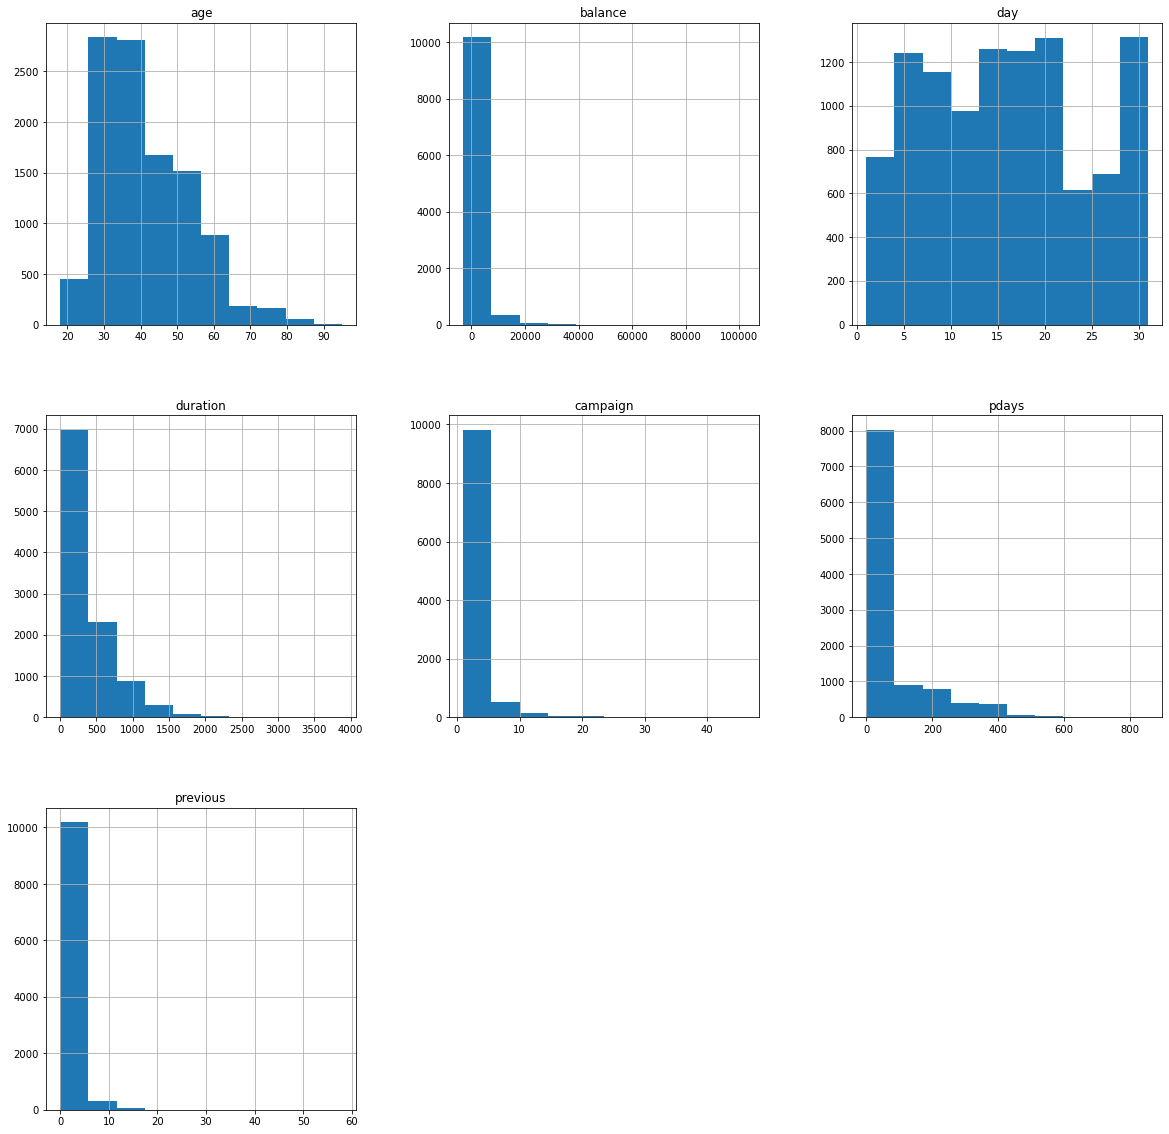

In [12]:
# Display histogram for the features
%matplotlib inline
df_new.hist(figsize=(20,20))
plt.show()

In [13]:
df_new.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.114941,-0.004199,-0.006759,-0.012707,0.008369,0.027825
balance,0.114941,1.000000,-0.001816,0.016884,-0.020972,0.018217,0.027427
day,-0.004199,-0.001816,1.000000,-0.008625,0.126886,-0.063985,-0.048340
duration,-0.006759,0.016884,-0.008625,1.000000,-0.024946,-0.032541,-0.022808
campaign,-0.012707,-0.020972,0.126886,-0.024946,1.000000,-0.097094,-0.055008
pdays,0.008369,0.018217,-0.063985,-0.032541,-0.097094,1.000000,0.509683
previous,0.027825,0.027427,-0.048340,-0.022808,-0.055008,0.509683,1.000000


<AxesSubplot:>

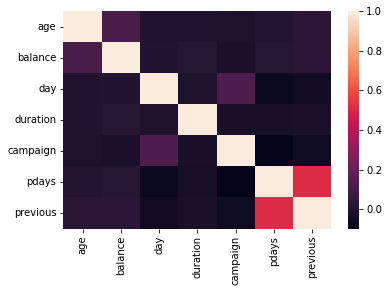

In [14]:
%matplotlib inline
sns.heatmap(df_new.corr())

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='balance', ylabel='age'>,
        <AxesSubplot:xlabel='day', ylabel='age'>,
        <AxesSubplot:xlabel='duration', ylabel='age'>,
        <AxesSubplot:xlabel='campaign', ylabel='age'>,
        <AxesSubplot:xlabel='pdays', ylabel='age'>,
        <AxesSubplot:xlabel='previous', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='balance'>,
        <AxesSubplot:xlabel='balance', ylabel='balance'>,
        <AxesSubplot:xlabel='day', ylabel='balance'>,
        <AxesSubplot:xlabel='duration', ylabel='balance'>,
        <AxesSubplot:xlabel='campaign', ylabel='balance'>,
        <AxesSubplot:xlabel='pdays', ylabel='balance'>,
        <AxesSubplot:xlabel='previous', ylabel='balance'>],
       [<AxesSubplot:xlabel='age', ylabel='day'>,
        <AxesSubplot:xlabel='balance', ylabel='day'>,
        <AxesSubplot:xlabel='day', ylabel='day'>,
        <AxesSubplot:xlabel='duration', ylabel='day'>,
        <AxesSubplo

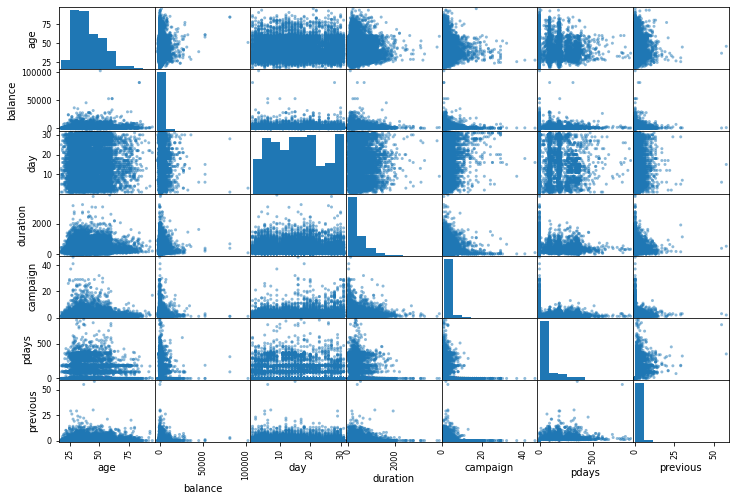

In [15]:
%matplotlib inline
from pandas.plotting import scatter_matrix
attr=['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']
scatter_matrix(df_new[attr],figsize=(12,8))


#### Observations from the data analysis
+ Most customer have a secondary education
+ Most calls were between 0-500 seconds
+ Most customers didn't have an existing loan
+ Most of customer called have atleast an Secondary Education
+ Most of the customer were called on the cellular phone

### Prepare the dataset
<p></p>

In [16]:
# Divide the data into dataset with relevant features and dataset for taget variable
x=df_new[['age', 'job', 'marital', 'education','default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month','duration', 'campaign', 'pdays',
       'previous', 'poutcome']]
y=df_new[['Target']]

In [17]:
num_features=['age','balance','day','duration','campaign','pdays','previous']
cat_features=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [18]:
# Build Pipelines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
num_pipeline=Pipeline(steps=[
    ('scale',StandardScaler())
])
cat_pipeline=Pipeline(steps=[
    ('onehot',OneHotEncoder())
    
])
full_pipeline=ColumnTransformer(transformers=[
    ('number',num_pipeline,num_features),
    ('categ',cat_pipeline,cat_features)
])

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
x_train_prep=full_pipeline.fit_transform(x_train)

In [20]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=200)
lr.fit(x_train_prep,np.ravel(y_train))

LogisticRegression(max_iter=200)

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
y_train_pred=lr.predict(x_train_prep)
acc_train=accuracy_score(y_train,y_train_pred)
print('Accuracy of Training model', acc_train)


Accuracy of Training model 0.8359725833136374


In [22]:
x_test_prep=full_pipeline.transform(x_test)
y_test_pred=lr.predict(x_test_prep)
acc_test=accuracy_score(y_test,y_test_pred)
print('Accuracy of Test model',acc_test)

Accuracy of Test model 0.8312854442344045


Confusion Matrix

<AxesSubplot:>

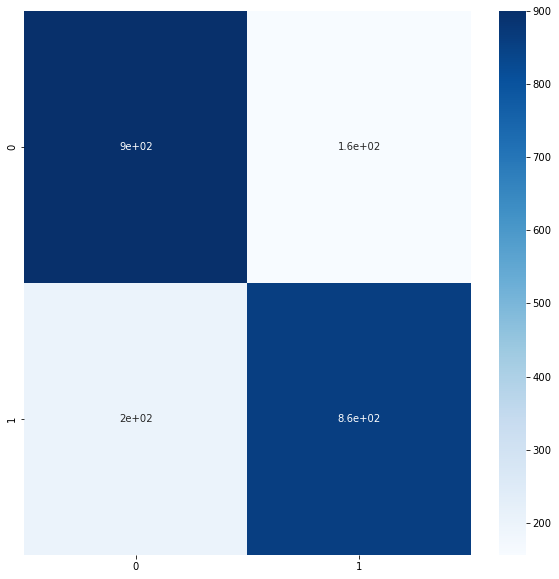

In [31]:
%matplotlib inline
plt.figure(figsize=(10,10))
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf,annot=True, cmap="Blues")

In [23]:
#Grid Search and Cross validation
from sklearn.model_selection import GridSearchCV
param_grid=[{'penalty':['l2'],'solver':['newton-cg', 'lbfgs', 'sag']},{'penalty':['l1'],'solver':['liblinear']}]
log_reg = LogisticRegression(max_iter=200)
grid = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=10)


In [24]:
grid.fit(x_train_prep,np.ravel(y_train))
grid.best_params_
grid.best_estimator_

LogisticRegression(max_iter=200, penalty='l1', solver='liblinear')

In [25]:
grid.cv_results_

{'mean_fit_time': array([0.18428171, 0.11431851, 0.43676195, 0.14913499]),
 'std_fit_time': array([0.01174377, 0.00660725, 0.0198312 , 0.02827577]),
 'mean_score_time': array([0.00179534, 0.        , 0.00156219, 0.        ]),
 'std_score_time': array([0.00468884, 0.        , 0.00468657, 0.        ]),
 'param_penalty': masked_array(data=['l2', 'l2', 'l2', 'l1'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_solver': masked_array(data=['newton-cg', 'lbfgs', 'sag', 'liblinear'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'penalty': 'l2', 'solver': 'newton-cg'},
  {'penalty': 'l2', 'solver': 'lbfgs'},
  {'penalty': 'l2', 'solver': 'sag'},
  {'penalty': 'l1', 'solver': 'liblinear'}],
 'split0_test_score': array([0.80283353, 0.80283353, 0.80283353, 0.80637544]),
 'split1_test_score': array([0.82880756, 0.82880756, 0.82880756, 0.83116883]),
 'split2_test_score'

##### Using the hyper paramters selected from grid search

In [59]:
from sklearn.linear_model import LogisticRegression
lr_best=LogisticRegression(max_iter=200, penalty='l2', solver='newton-cg')
lr_best.fit(x_train_prep,np.ravel(y_train))


from sklearn.metrics import accuracy_score
y_train_best=lr_best.predict(x_train_prep)
acc_train=accuracy_score(y_train,y_train_best)
print('Accuracy of Training model',acc_train)

x_test_prep=full_pipeline.transform(x_test)
y_test_best=lr_best.predict(x_test_prep)
acc_test=accuracy_score(y_test,y_test_best)
print('Accuracy of Test model', acc_test)

Accuracy of Training model 0.8354998818246278
Accuracy of Test model 0.8379017013232514


<AxesSubplot:>

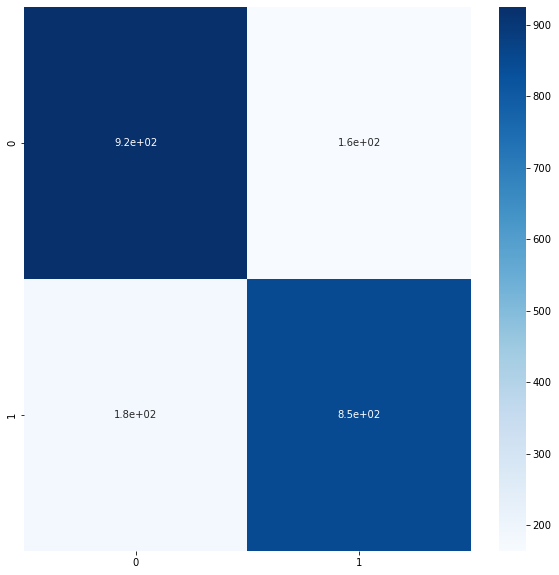

In [60]:
%matplotlib inline
plt.figure(figsize=(10,10))
from sklearn.metrics import confusion_matrix
conf1=confusion_matrix(y_test, y_test_best)
sns.heatmap(conf1,annot=True, cmap="Blues")

In [61]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
print("ROC Score",roc_auc_score(y_test, lr_best.predict_proba(x_test_prep)[:, 1]))
# roc_auc_score(y_test, lr_best.predict_proba(x_test_prep))
print(classification_report(y_test,y_test_best))

ROC Score 0.9091847929592463
              precision    recall  f1-score   support

          no       0.84      0.85      0.84      1089
         yes       0.84      0.83      0.83      1027

    accuracy                           0.84      2116
   macro avg       0.84      0.84      0.84      2116
weighted avg       0.84      0.84      0.84      2116



<Figure size 720x720 with 0 Axes>

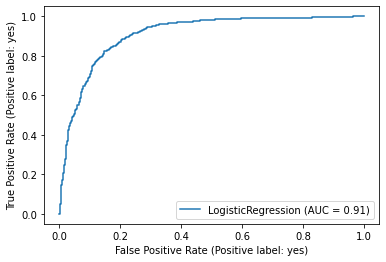

In [62]:
from sklearn.metrics import plot_roc_curve
%matplotlib inline
plt.figure(figsize=(10,10))
plot_roc_curve(lr_best,x_test_prep,y_test)
plt.show()

#### Using Stocastic Gradient Descent

In [27]:
from sklearn.linear_model import SGDClassifier
clf=SGDClassifier(loss='log',tol=1e-4,shuffle=True,learning_rate='optimal')
clf.fit(x_train_prep,np.ravel(y_train))

y_train_clf=clf.predict(x_train_prep)
acc_train_clf=accuracy_score(y_train,y_train_clf)

x_test_prep=full_pipeline.transform(x_test)
y_test_clf=clf.predict(x_test_prep)
acc_test_clf=accuracy_score(y_test,y_test_clf)

In [28]:
print('Accuracy of Train model', acc_train_clf)
print('Accuracy of Test model', acc_test_clf)

Accuracy of Train model 0.8208461356653274
Accuracy of Test model 0.8171077504725898


<AxesSubplot:>

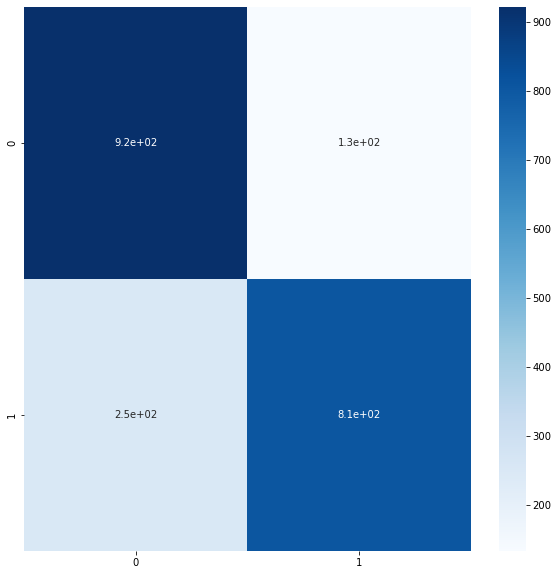

In [33]:
%matplotlib inline
plt.figure(figsize=(10,10))
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_test, y_test_clf)
sns.heatmap(conf,annot=True, cmap="Blues")

In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
print('ROC Score',roc_auc_score(y_test, clf.predict_proba(x_test_prep)[:, 1]))
# print('AUC-ROC score =', sgd_roc_auc)
print(classification_report(y_test, y_test_clf))

ROC Score 0.8999008361921098
              precision    recall  f1-score   support

          no       0.78      0.87      0.83      1056
         yes       0.86      0.76      0.81      1060

    accuracy                           0.82      2116
   macro avg       0.82      0.82      0.82      2116
weighted avg       0.82      0.82      0.82      2116



<Figure size 720x720 with 0 Axes>

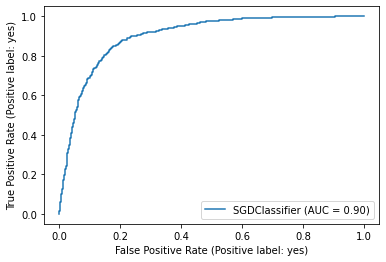

In [44]:
from sklearn.metrics import plot_roc_curve
%matplotlib inline
plt.figure(figsize=(10,10))
plot_roc_curve(clf,x_test_prep,y_test)
plt.show()